In [11]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
# Drop the column 
df.drop(columns='ADDRESSLINE2', inplace=True)
print("NUMBER OF EMPTY CELLS")
print(df.isnull().sum())
print(df.head())

NUMBER OF EMPTY CELLS
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4    

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [3]:
print(df.shape)

(2823, 25)


In [13]:
# Fill the Missing Values
df['STATE'] = df['STATE'].fillna("Unknown")
df["POSTALCODE"] = df["POSTALCODE"].fillna("00000")
df["TERRITORY"] = df["TERRITORY"].fillna("Unknown")
print(df.head(5))


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...             PHONE  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...        2125557818   
1    5/7/2003 0:00  Shipped       2         5     2003  ...        26.47.1555   
2    7/1/2003 0:00  Shipped       3         7     2003  ...  +33 1 46 62 7555   
3   8/25/2003 0:00  Shipped       3         8     2003  ...        6265557265   
4  10/10/2003 0:00  Shipped       4        10     2003  ...        6505551386   

                    ADDRESSLINE1           CITY    STATE POSTALCODE COUNTRY  \
0

In [14]:
# Map to clean, consistent names (title case):
df['STATUS'] = df['STATUS'].str.strip().str.lower()
status_map = {
    "cancelled": "Cancelled",
    "disputed": "Disputed",
    "in process": "In Process",
    "on hold": "On Hold",
    "resolved": "Resolved",
    "shipped": "Shipped"
}
df["STATUS"] = df["STATUS"].map(status_map)
print(df["STATUS"].unique())

['Shipped' 'Disputed' 'In Process' 'Cancelled' 'On Hold' 'Resolved']


In [15]:
# 1. Sales by Year, Quarter, Month.
# Sales by Year
sales_by_year = df.groupby("YEAR_ID")["SALES"].sum()
print(sales_by_year)


YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64


In [16]:
# Sales by Quarter
sales_by_quarter = df.groupby(["YEAR_ID", "QTR_ID"])["SALES"].sum()
print(sales_by_quarter)


YEAR_ID  QTR_ID
2003     1          445094.69
         2          562365.22
         3          649514.54
         4         1860005.09
2004     1          833730.68
         2          766260.73
         3         1109396.27
         4         2014774.92
2005     1         1071992.36
         2          719494.35
Name: SALES, dtype: float64


In [17]:
# Sales by Months
sales_by_month = df.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum()
print(sales_by_month)


YEAR_ID  MONTH_ID
2003     1            129753.60
         2            140836.19
         3            174504.90
         4            201609.55
         5            192673.11
         6            168082.56
         7            187731.88
         8            197809.30
         9            263973.36
         10           568290.97
         11          1029837.66
         12           261876.46
2004     1            316577.42
         2            311419.53
         3            205733.73
         4            206148.12
         5            273438.39
         6            286674.22
         7            327144.09
         8            461501.27
         9            320750.91
         10           552924.25
         11          1089048.01
         12           372802.66
2005     1            339543.42
         2            358186.18
         3            374262.76
         4            261633.29
         5            457861.06
Name: SALES, dtype: float64


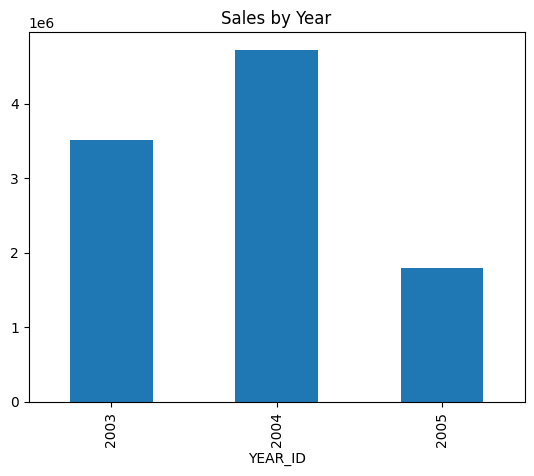

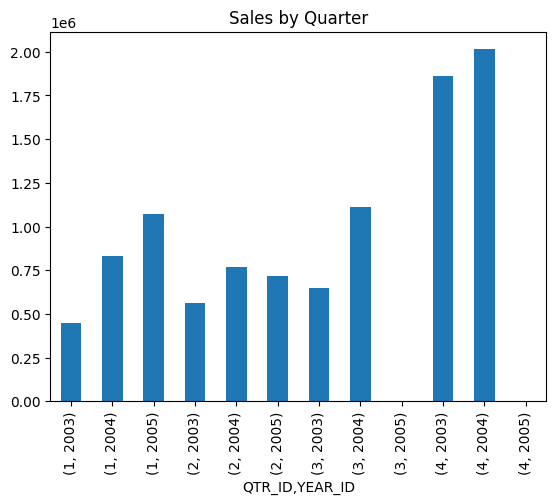

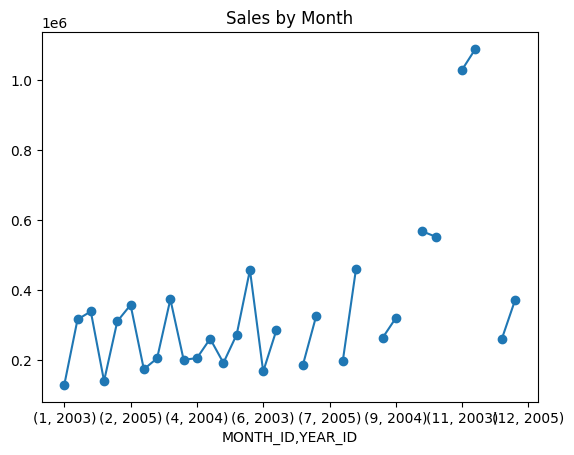

In [28]:
import matplotlib.pyplot as plt

# Sales by Year
sales_by_year.plot(kind="bar", title="Sales by Year")
plt.show()

# Sales by Quarter
sales_by_quarter.unstack().plot(kind="bar", title="Sales by Quarter")
plt.show()

# Sales by Month
sales_by_month.unstack().plot(kind="line", marker="o", title="Sales by Month")
plt.show()


In [29]:
# 2. Group Sales by Product Line
sales_by_product = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)
print(sales_by_product)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


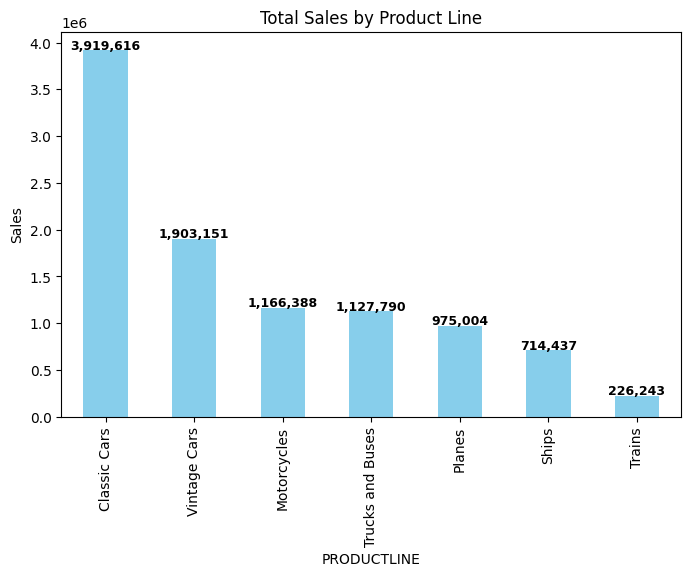

In [30]:
# Visulization - Bar Chart

ax = sales_by_product.plot(kind="bar", figsize=(8, 5), title="Total Sales by Product Line", color="skyblue")

# Add total sales labels on bars
for i, v in enumerate(sales_by_product):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold", fontsize=9)

plt.ylabel("Sales")
plt.show()

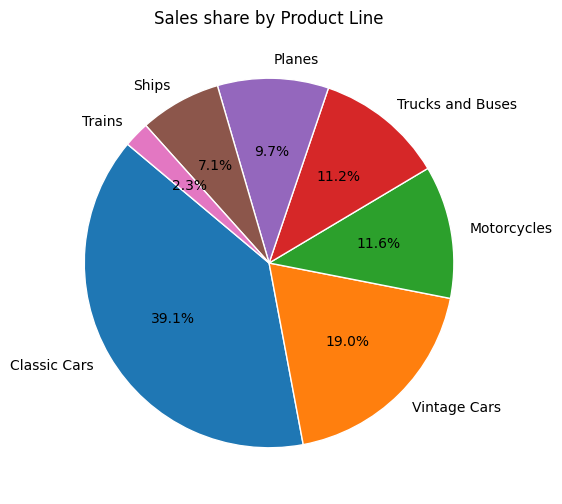

In [31]:
# Visualization - Pie/Donut Chart
plt.figure(figsize=(6,6))
plt.pie(sales_by_product, labels=sales_by_product.index, autopct="%1.1f%%", startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Sales share by Product Line")
plt.show()

In [32]:
# 3. Sales by Territory

sales_by_territory = df.groupby("TERRITORY")["SALES"].sum().sort_values(ascending=False)
print(sales_by_territory)

TERRITORY
EMEA       4979272.41
Unknown    3852061.39
APAC        746121.83
Japan       455173.22
Name: SALES, dtype: float64


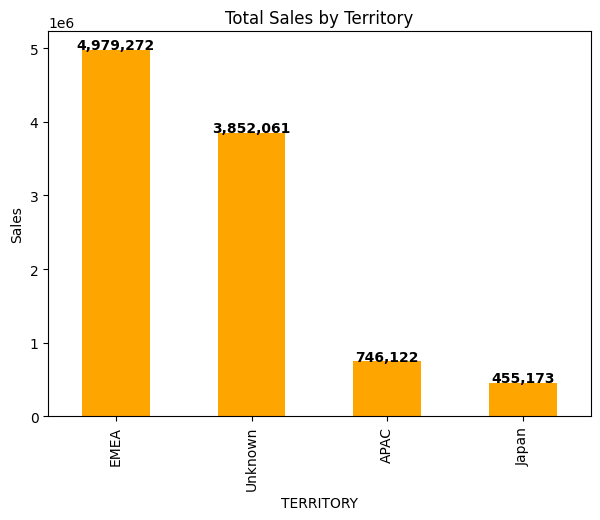

In [34]:
import matplotlib.pyplot as plt

ax = sales_by_territory.plot(kind="bar", figsize=(7,5), title="Total Sales by Territory", color="orange")

# Add totals on bars
for i, v in enumerate(sales_by_territory):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()


In [35]:
# Sales by Country

sales_by_country = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)
print(sales_by_country.head(10))  # Top 10 countries

COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64


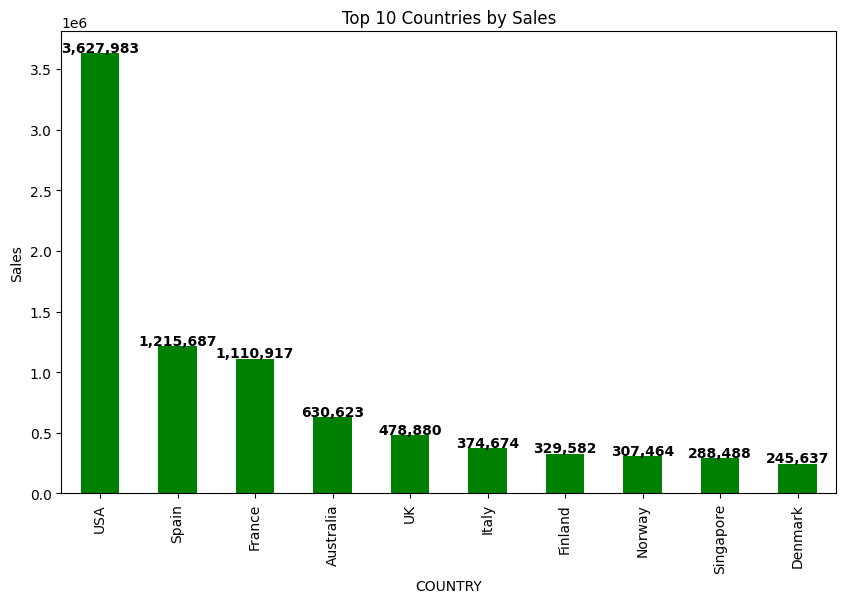

In [38]:
# Visualization (Sales by Country)

top_countries = sales_by_country.head(10)

ax = top_countries.plot(kind="bar", figsize=(10,6), title="Top 10 Countries by Sales", color="green")

# Add totals
for i, v in enumerate(top_countries):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()

In [39]:
# 4. Sales by Deal Size (Small/Medium/Large).

sales_by_dealsize = df.groupby("DEALSIZE")["SALES"].sum().sort_values(ascending=False)
print(sales_by_dealsize)

DEALSIZE
Medium    6087432.24
Small     2643077.35
Large     1302119.26
Name: SALES, dtype: float64


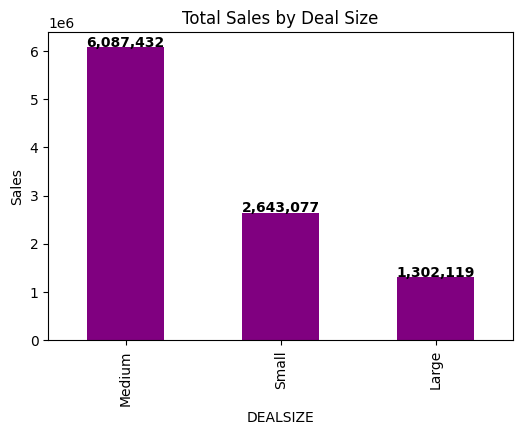

In [41]:
# Visualization : Bar Chart with Totals

import matplotlib.pyplot as plt

ax = sales_by_dealsize.plot(kind="bar", figsize=(6,4), title="Total Sales by Deal Size", color="purple")

# Add total labels
for i, v in enumerate(sales_by_dealsize):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()


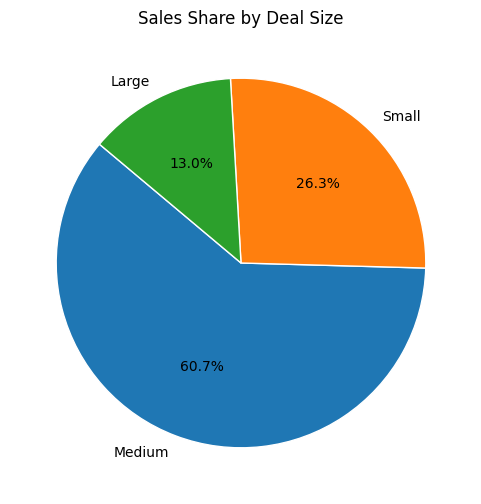

In [43]:
# Pie/Donut Chart

plt.figure(figsize=(6,6))
plt.pie(
    sales_by_dealsize,
    labels=sales_by_dealsize.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={'linewidth':1, 'edgecolor':'white'}
)
plt.title("Sales Share by Deal Size")
plt.show()

In [ ]:
# Customer Insights

In [44]:
# 1. Top customers by sales.
top_customers = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False)
print(top_customers)

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
                                  ...    
Royale Belge                     33440.10
Microscale Inc.                  33144.93
Auto-Moto Classics Inc.          26479.26
Atelier graphique                24179.96
Boards & Toys Co.                 9129.35
Name: SALES, Length: 92, dtype: float64


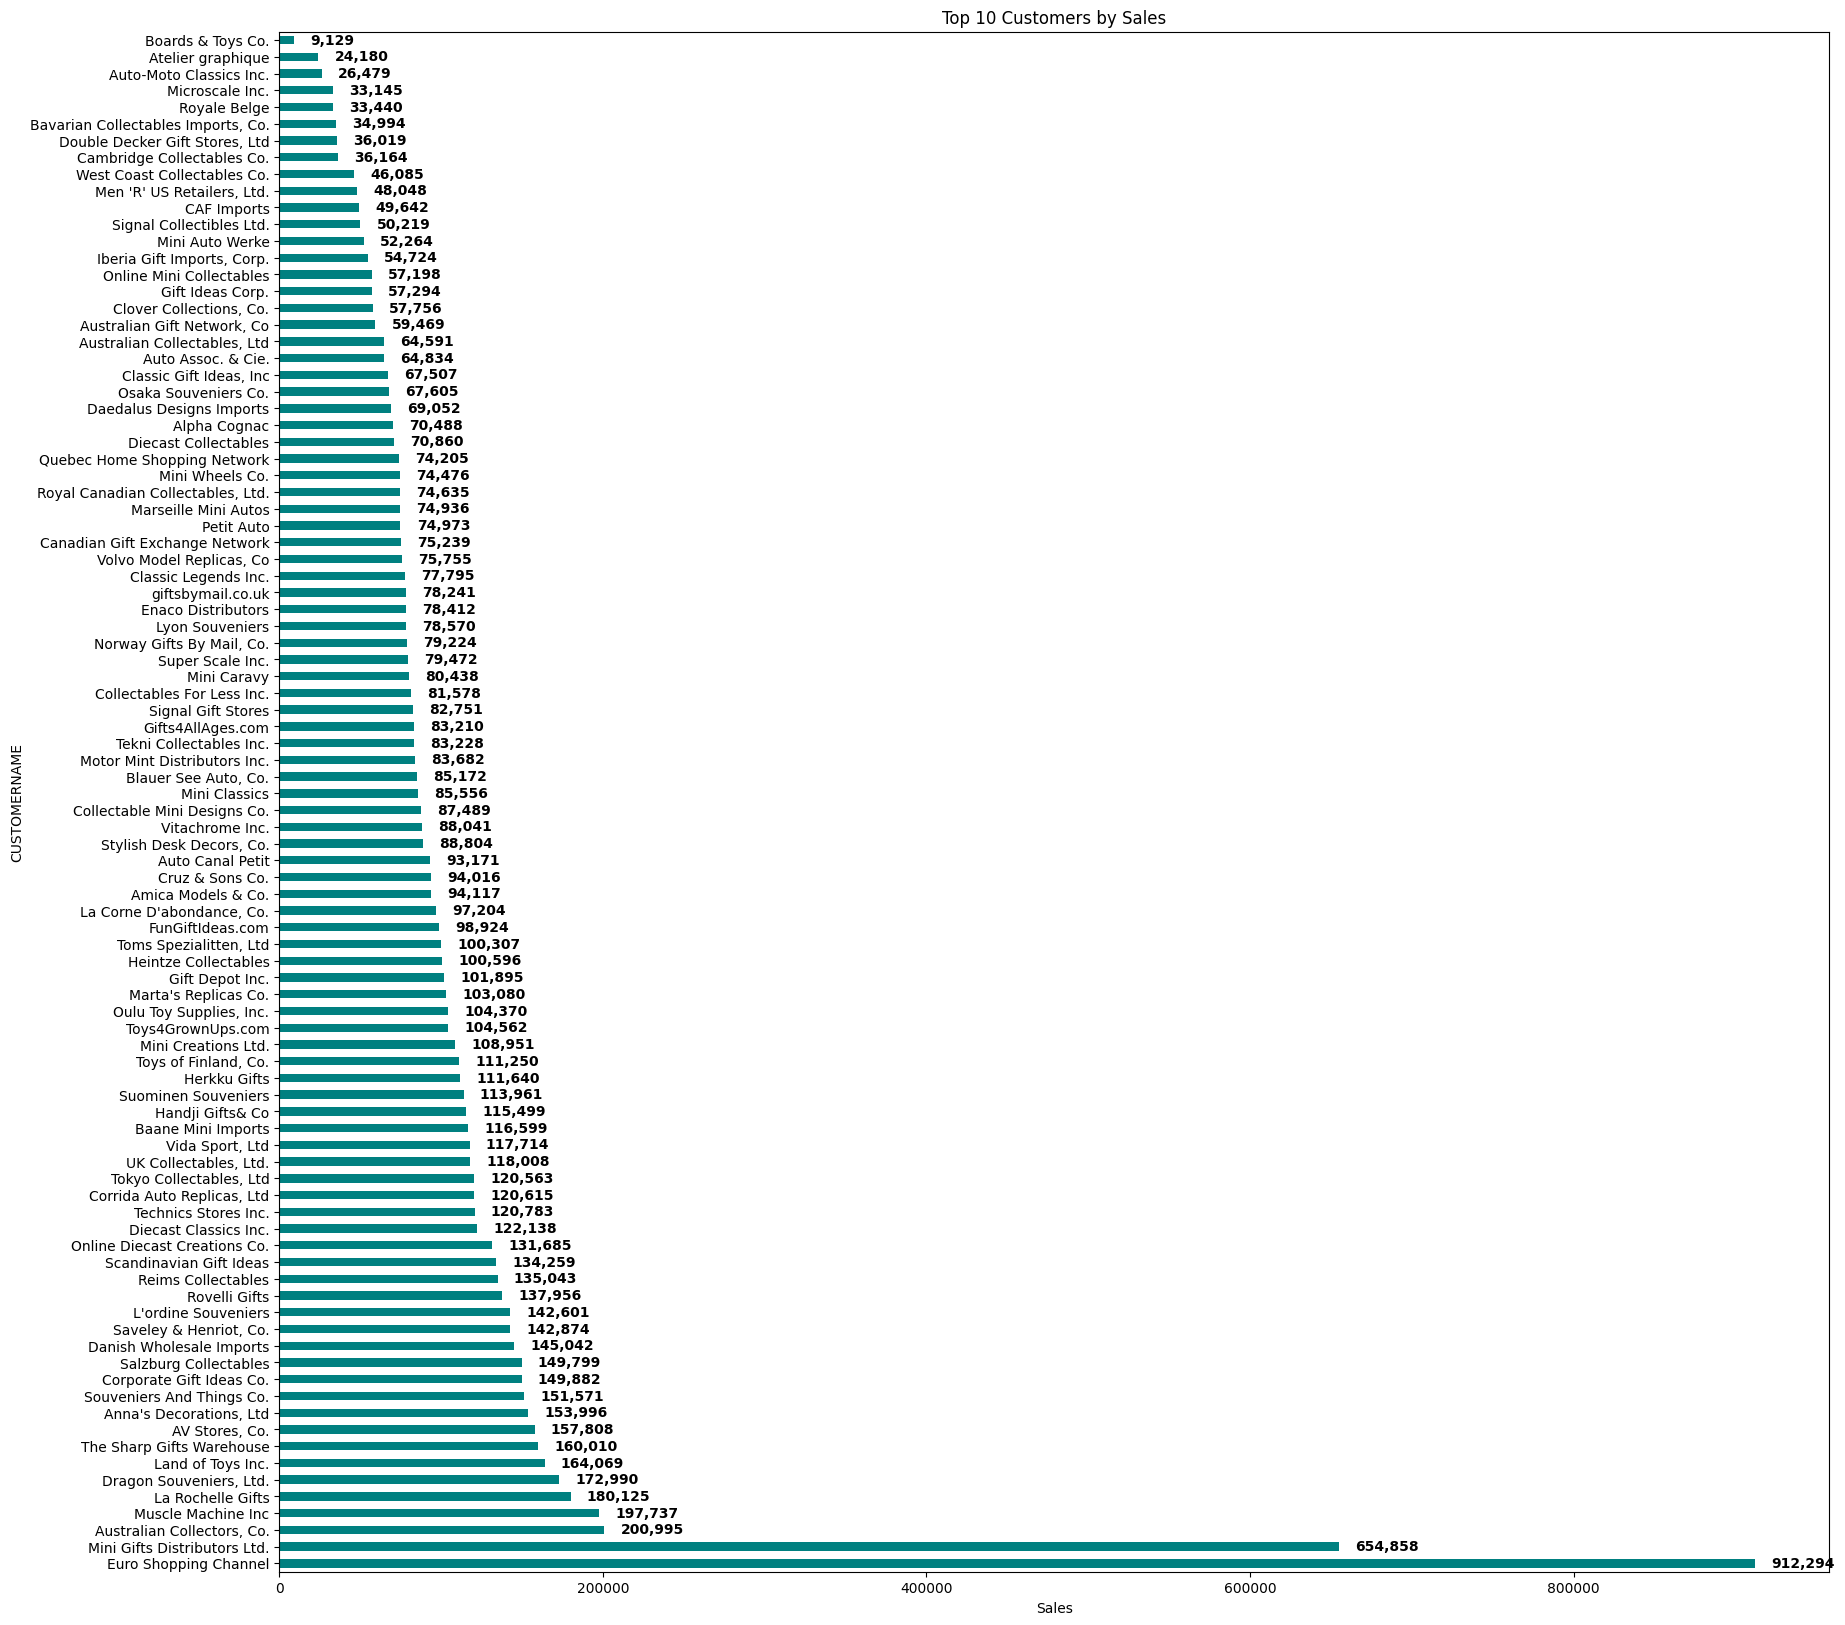

In [50]:
ax = top_customers.plot(kind="barh", figsize=(20,20), title="Top 10 Customers by Sales", color="teal")
for i, v in enumerate(top_customers):
    ax.text(v + 10000, i, f"{v:,.0f}", va="center", fontweight="bold")

plt.xlabel("Sales")
plt.show()

In [54]:
# 2. Cities/States Generating the Most Sales
sales_by_city = df.groupby("CITY")["SALES"].sum().sort_values(ascending=False)
print(sales_by_city)


CITY
Madrid         1082551.44
San Rafael      654858.06
NYC             560787.77
Singapore       288488.41
Paris           268944.68
                  ...    
Brisbane         50218.51
Los Angeles      48048.46
Burbank          46084.64
Munich           34993.92
Charleroi        33440.10
Name: SALES, Length: 73, dtype: float64


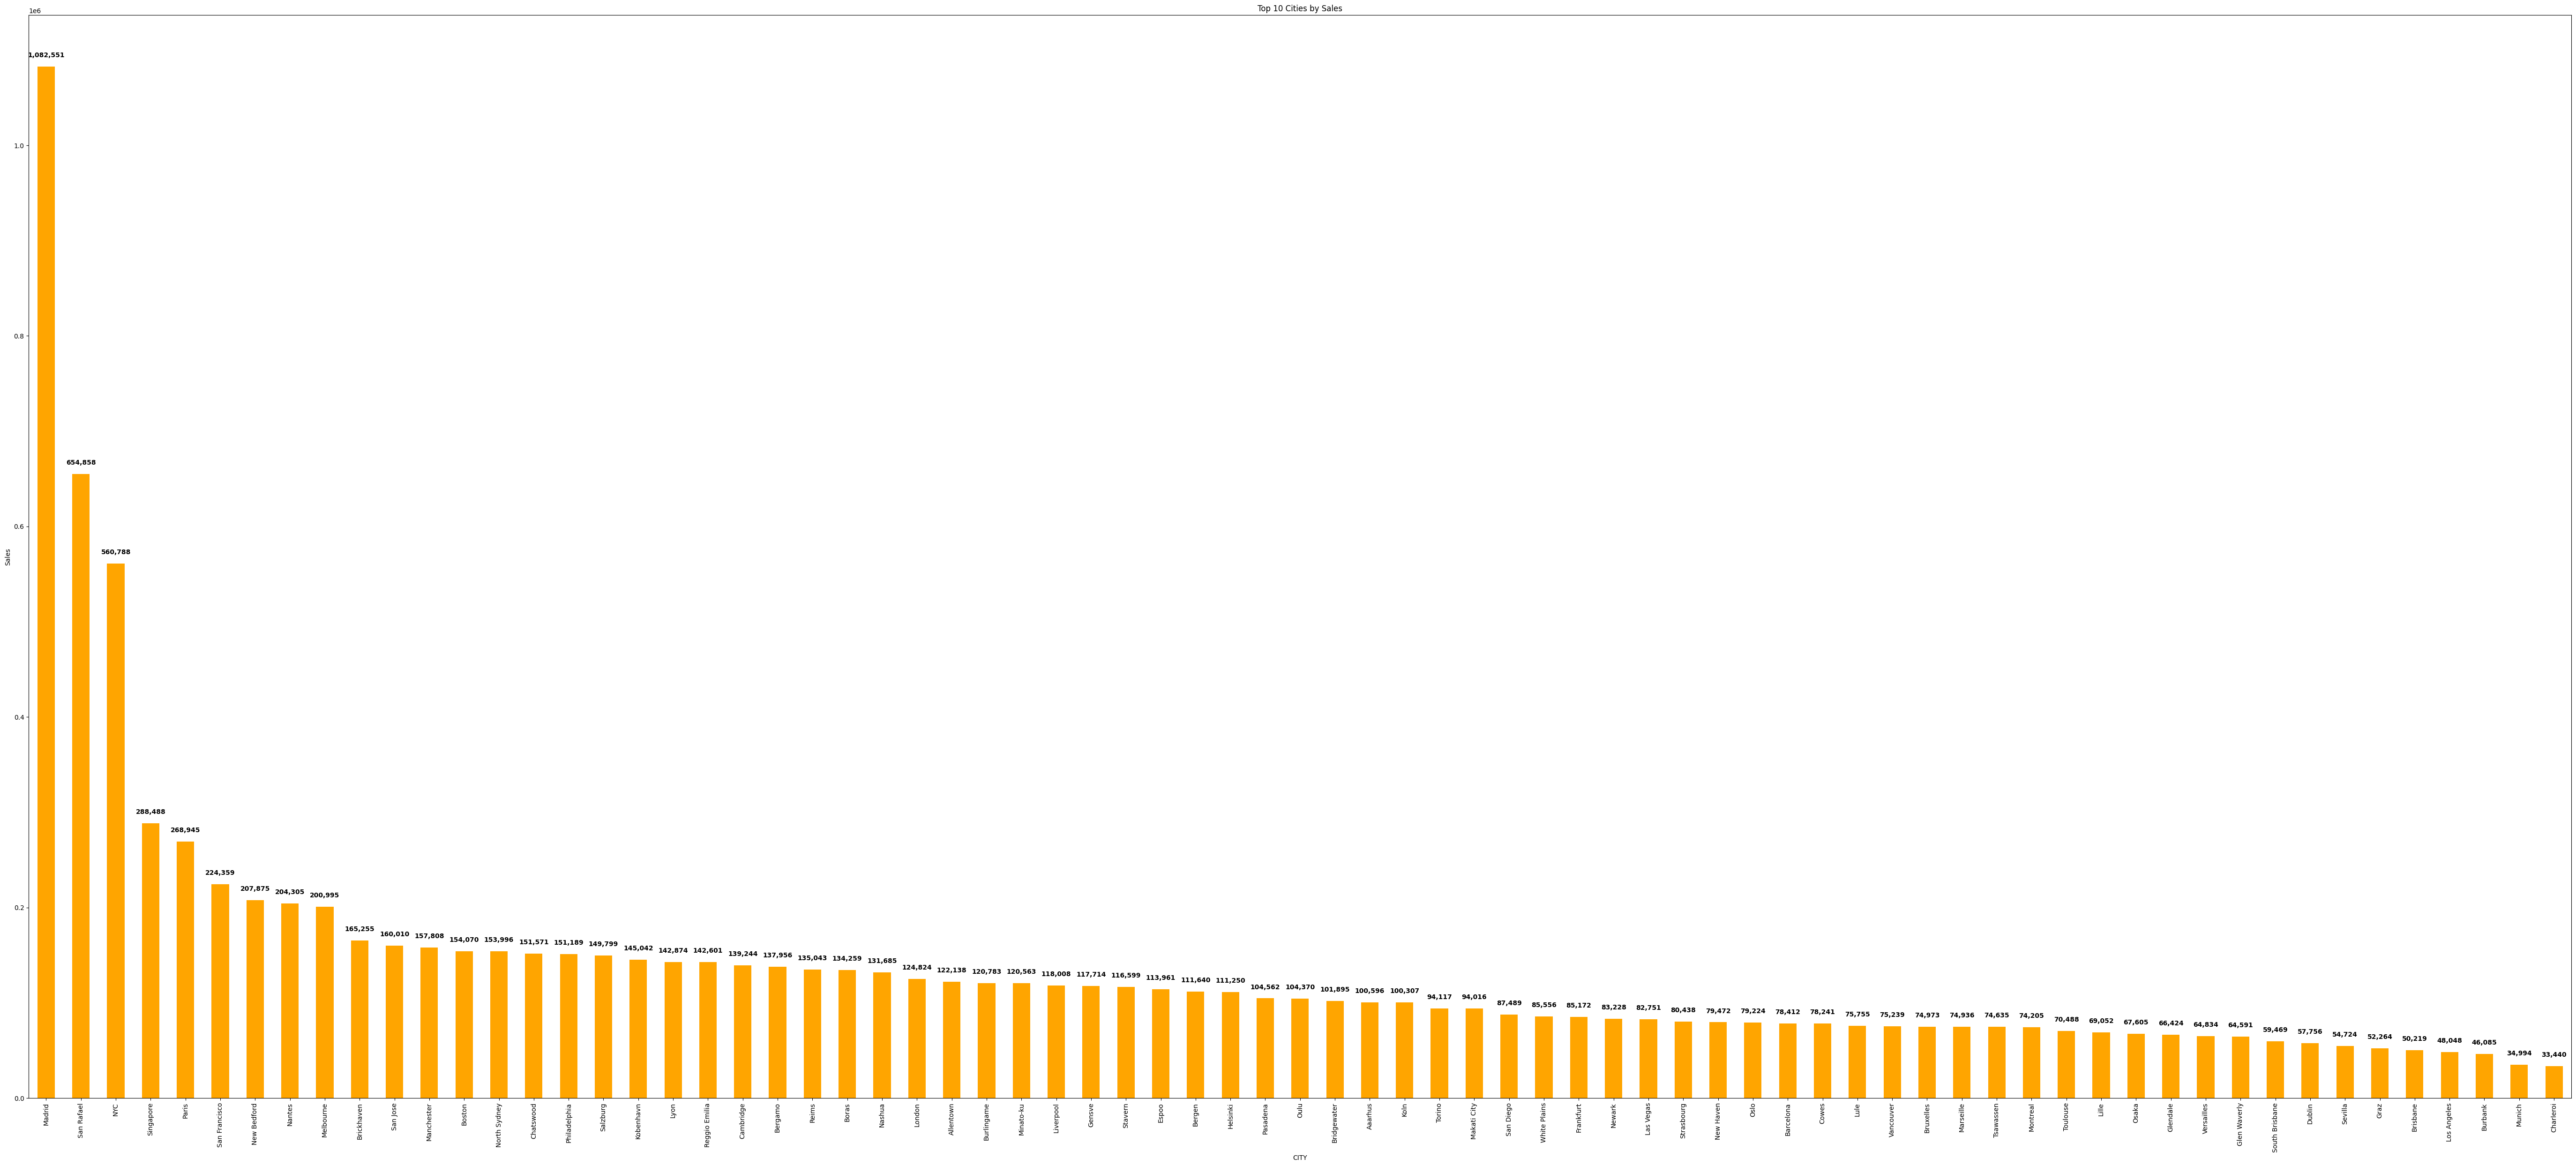

In [59]:
ax = sales_by_city.plot(kind="bar", figsize=(70,30), title="Top 10 Cities by Sales", color="orange")
for i, v in enumerate(sales_by_city):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()

In [60]:
#3. Identify Territories with Weak/Missing Sales
sales_by_territory = df.groupby("TERRITORY")["SALES"].sum().sort_values(ascending=True)
print(sales_by_territory)

TERRITORY
Japan       455173.22
APAC        746121.83
Unknown    3852061.39
EMEA       4979272.41
Name: SALES, dtype: float64


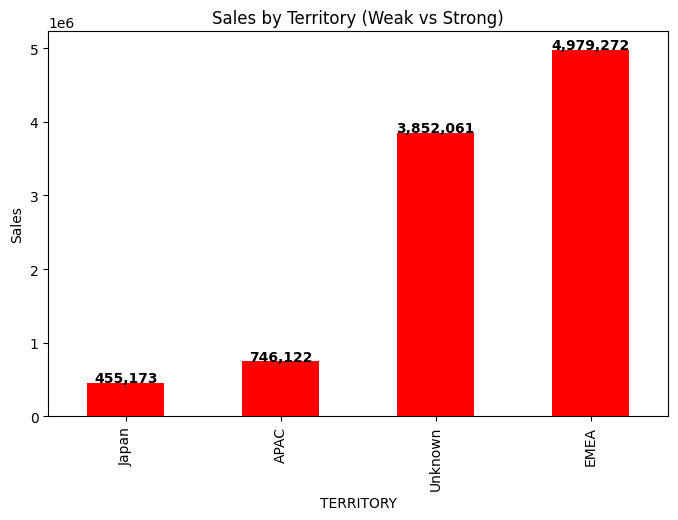

In [61]:
# Visualization: Identify Territories with Waek/Missing Sales

ax = sales_by_territory.plot(kind="bar", figsize=(8,5), title="Sales by Territory (Weak vs Strong)", color="red")
for i, v in enumerate(sales_by_territory):
    ax.text(i, v + 10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()

In [ ]:
# 4. Visualization

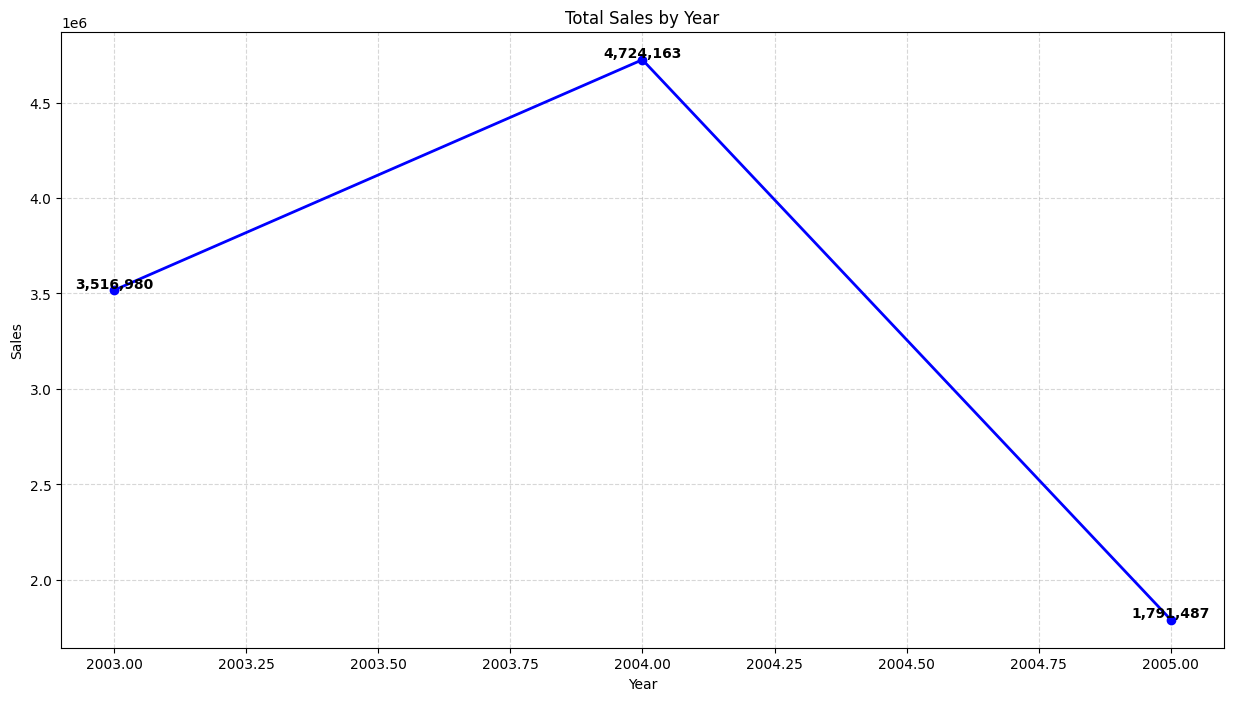

In [64]:
# a. Time-series plots for sales over yeras.

import matplotlib.pyplot as plt

sales_by_year = df.groupby("YEAR_ID")["SALES"].sum()

plt.figure(figsize=(15,8))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o", linewidth=2, color="blue")
for i, v in enumerate(sales_by_year):
    plt.text(sales_by_year.index[i], v+10000, f"{v:,.0f}", ha="center", fontweight="bold")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

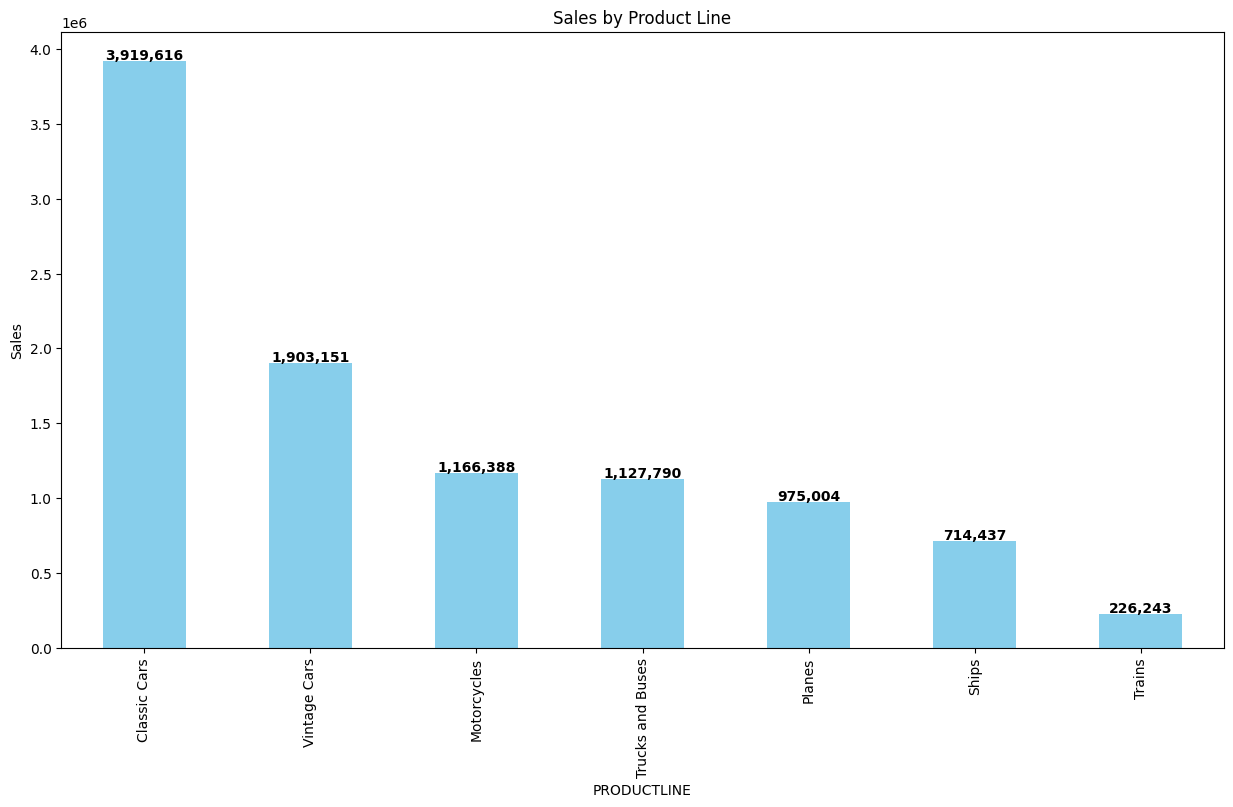

In [65]:
# b. Bar Chart: Sales by Product Line

sales_by_product = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)

ax = sales_by_product.plot(kind="bar", figsize=(15,8), title="Sales by Product Line", color="skyblue")
for i, v in enumerate(sales_by_product):
    ax.text(i, v+10000, f"{v:,.0f}", ha="center", fontweight="bold")
plt.ylabel("Sales")
plt.show()

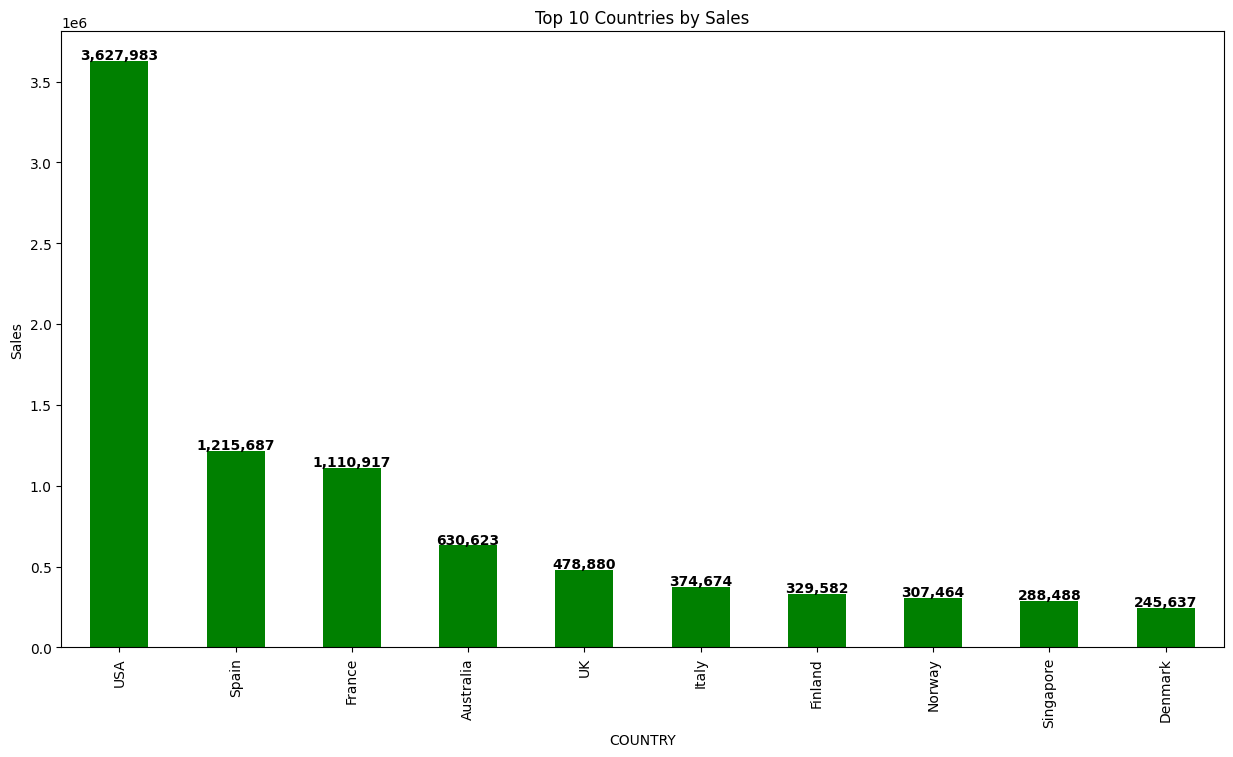

In [66]:
# c. Bar Chart: Top 10 Countries by Sales

sales_by_country = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10)

ax = sales_by_country.plot(kind="bar", figsize=(15,8), title="Top 10 Countries by Sales", color="green")
for i, v in enumerate(sales_by_country):
    ax.text(i, v+10000, f"{v:,.0f}", ha="center", fontweight="bold")

plt.ylabel("Sales")
plt.show()

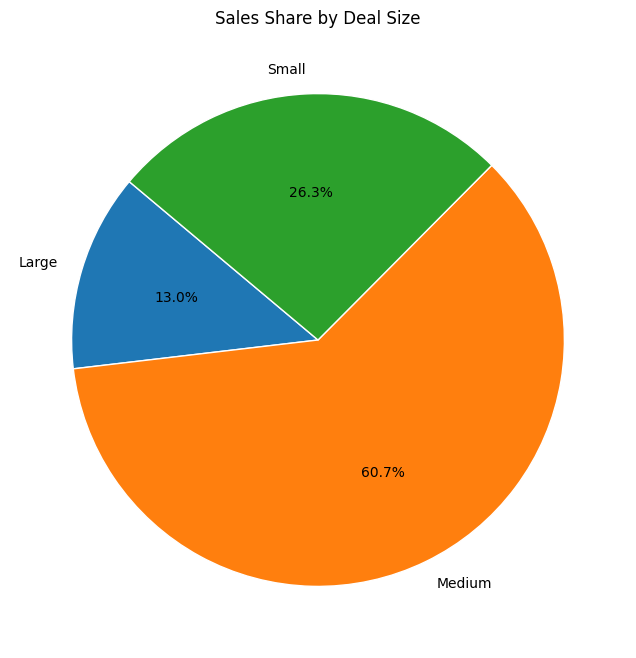

In [67]:
# d. Pie/Donut Chart: Deal Size Distribution

sales_by_dealsize = df.groupby("DEALSIZE")["SALES"].sum()

plt.figure(figsize=(15,8))
plt.pie(
    sales_by_dealsize,
    labels=sales_by_dealsize.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={'linewidth':1, 'edgecolor':'white'}
)

plt.title("Sales Share by Deal Size")
plt.show()

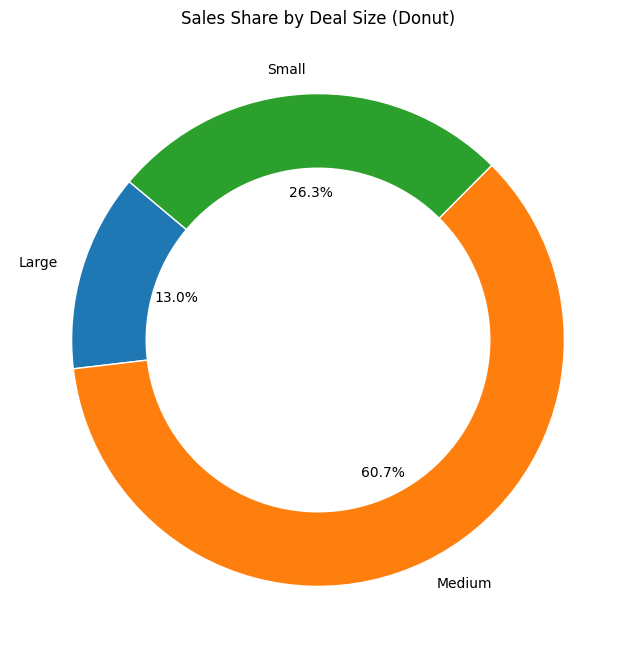

In [68]:
# Donut version:

plt.figure(figsize=(15, 8))
plt.pie(
    sales_by_dealsize,
    labels=sales_by_dealsize.index,
    autopct="%1.1f%%",
    startangle=140,
    wedgeprops={'linewidth':1, 'edgecolor': 'white'}
)

# Draw white circle in middle to make donut
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Sales Share by Deal Size (Donut)")
plt.show()